1.Load and prepare a dataset for binary classification.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


 2.Train an SVM with linear and RBF kernel.


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

print("Linear Kernel SVM:\n", classification_report(y_test, svm_linear.predict(X_test)))
print("RBF Kernel SVM:\n", classification_report(y_test, svm_rbf.predict(X_test)))


Linear Kernel SVM:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

RBF Kernel SVM:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



 3.Visualize decision boundary using 2D data.


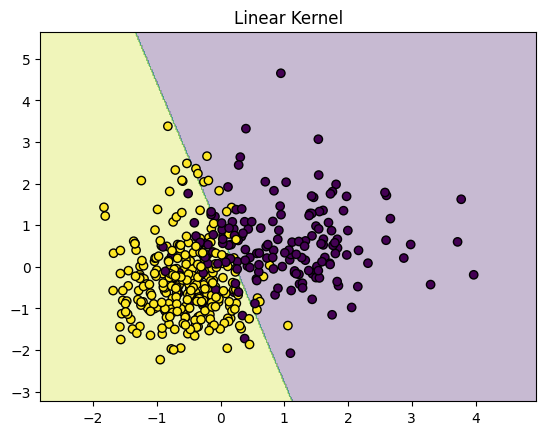

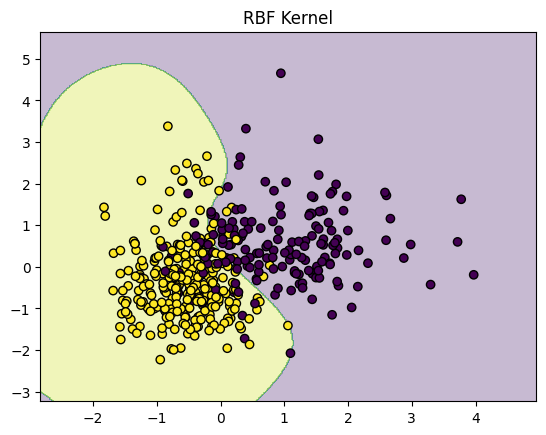

In [3]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

model_linear_vis = SVC(kernel='linear', C=1.0).fit(X_train_vis, y_train_vis)
model_rbf_vis = SVC(kernel='rbf', C=1.0, gamma='scale').fit(X_train_vis, y_train_vis)

plot_decision_boundary(X_train_vis, y_train_vis, model_linear_vis, "Linear Kernel")
plot_decision_boundary(X_train_vis, y_train_vis, model_rbf_vis, "RBF Kernel")


 4.Tune hyperparameters like C and gamma.


In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.9736263736263737


 5.Use cross-validation to evaluate performance.


In [5]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(SVC(kernel='rbf', C=1, gamma='scale'), X_scaled, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV Accuracy: 0.9736376339077782
